In [1]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from numpy import arange

There are 510 instances.
         x       y
0  10.5392  1.2058
1   5.1571  2.6770
2  12.6563  3.1471
3  11.7546  2.3668
4  10.9499  2.3400


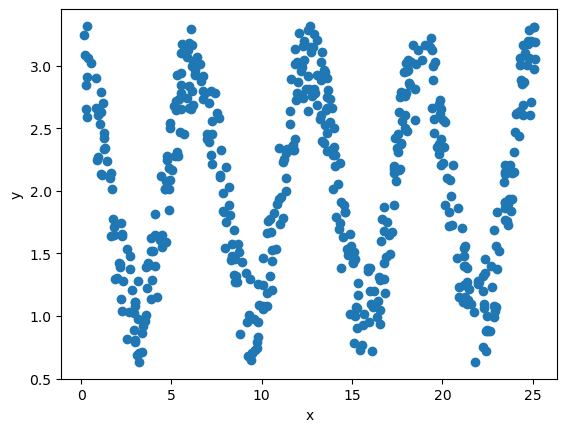

In [2]:
dataset = pd.read_csv('Lab10_train.csv')
print(f"There are {len(dataset.index)} instances.")
print(dataset.head())
plt.scatter(dataset['x'], dataset['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
def split_dataset(dataset, train_frac=0.7):
    train = dataset.sample(frac=train_frac)
    val = dataset.drop(train.index)
    return train, val

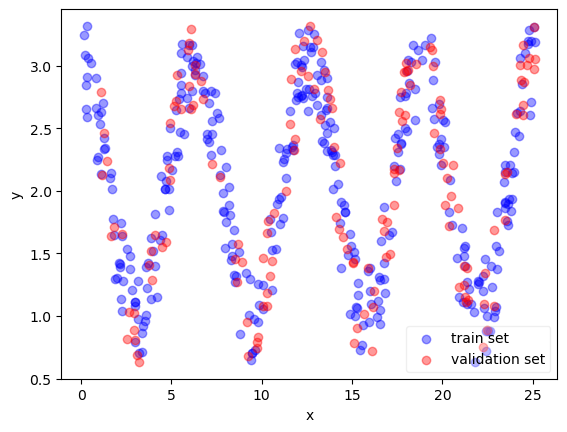

In [4]:
# Split dataset into train and validation:
train, validation = split_dataset(dataset, train_frac=0.7)
plt.scatter(train['x'], train['y'], c='blue', alpha=0.4)
plt.scatter(validation['x'], validation['y'], c='red', alpha=0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['train set', 'validation set'], framealpha=0.3)
plt.show()

In [5]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,001 (316.41 KB)

 Trainable params: 81,001 (316.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# Train:
loss = 'mse'
metric = 'mae'

epochs = 1750

# dataset is split ‘X’ as input to model
# ‘Y’ as the expected output of model 
x_train, y_train = train['x'], train['y']
x_val, y_val = validation['x'], validation['y']

model.compile(loss=loss, optimizer='adam', metrics=[metric])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(x_val, y_val))


Epoch 1/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 5.6155 - mae: 2.1539 - val_loss: 0.6967 - val_mae: 0.7103
Epoch 2/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0685 - mae: 0.8224 - val_loss: 1.6610 - val_mae: 1.0460
Epoch 3/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2879 - mae: 0.9276 - val_loss: 0.6017 - val_mae: 0.6858
Epoch 4/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5531 - mae: 0.6400 - val_loss: 0.8623 - val_mae: 0.7762
Epoch 5/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7295 - mae: 0.7062 - val_loss: 0.6667 - val_mae: 0.7099
Epoch 6/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5803 - mae: 0.6662 - val_loss: 0.6439 - val_mae: 0.6948
Epoch 7/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5660 - mae: 0.6304 - val_loss: 0.6356 - val_mae: 0.6919
Epoch 8/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5581 - mae: 0.6453 - val_loss: 0.6108 - val_mae: 0.6933
Epoch 9/1750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.54

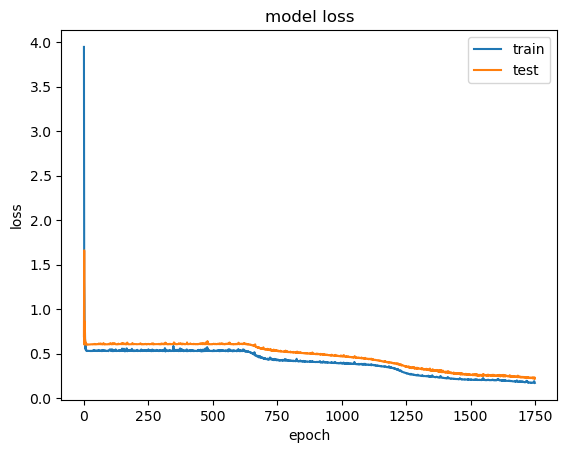

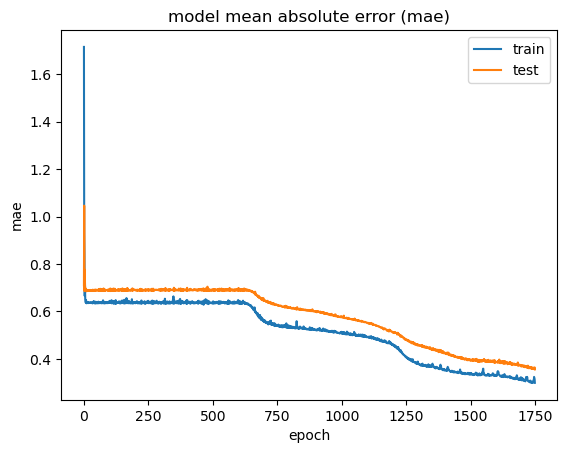

In [7]:
# Display loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Display metric:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error (mae)')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()